In [94]:
#pip install WordCloud
#pip install xgboost

In [95]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import seaborn as sns
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

# Constants
textTrainSplit = 0.99
solution="SpamDetective"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [96]:
df = pd.read_csv('./dataset/spam.csv', encoding='latin1')

In [97]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#FFEEDD")]}
])
styled_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [99]:
# To be executed only once
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [100]:
styled_df = df.head(5).style

styled_df.set_table_styles([
    {
        "selector": "th",
        "props": [("color",'black'), ("background-color", '#FFEEDD')]
    }
])

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [101]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [102]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [103]:
styled_df = df.head(5).style

styled_df.set_table_styles([
    {
        "selector": "th",
        "props": [("color",'black'), ("background-color", '#FFEEDD')]
    }
])

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [104]:
#checking missing values
print(f"Nulls:\n{df.isnull().sum()}\n")

# Check duplicates
print(f"Duplicates:\n{df.duplicated().sum()}")

Nulls:
target    0
text      0
dtype: int64

Duplicates:
403


In [105]:
df.drop_duplicates(keep='first', inplace=True)

In [106]:
df.shape

(5169, 2)

In [107]:
values = df['target'].value_counts()
total = values.sum()

p0 = (values[0] / total) * 100
p1 = (values[1] / total) * 100

print(f"% of Hams: {p0}")
print(f"% of Spams: {p1}")

% of Hams: 87.3669955503966
% of Spams: 12.633004449603405


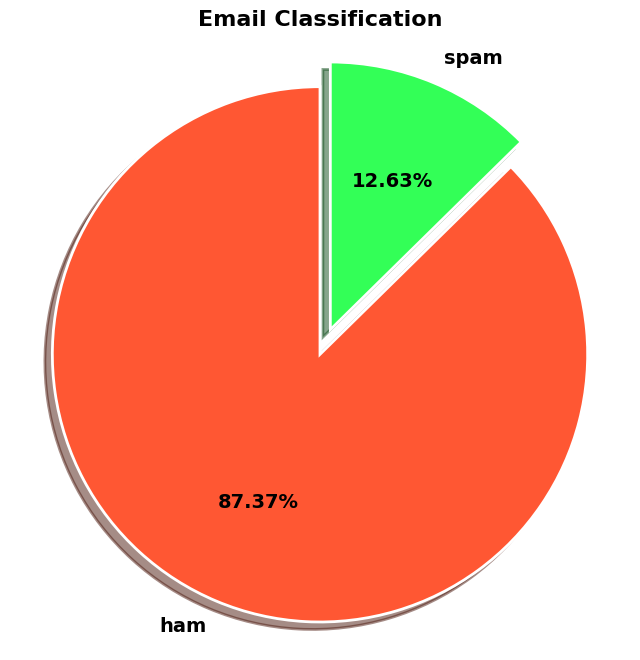

In [108]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

In [109]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [110]:
# Ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [111]:
# Spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [112]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [113]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [114]:
df['transformed_text'] = df['text'].apply(transform_text)

In [115]:
styled_df = df.head(5).style

styled_df.set_table_styles([
    {
        "selector": "th",
        "props": [("color", "black"), ("background-color", "#FFEEDD")]
    }
    ])

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


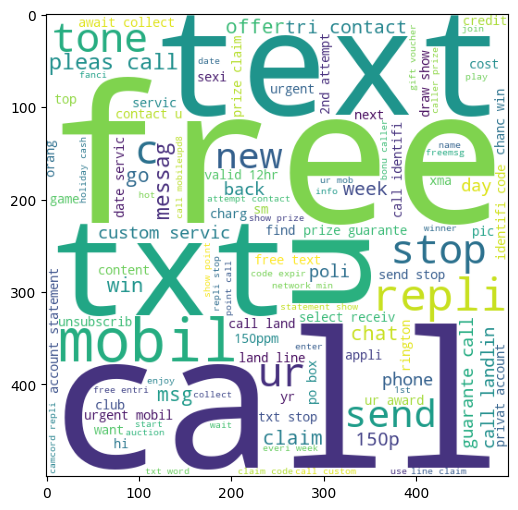

In [116]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
ham_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

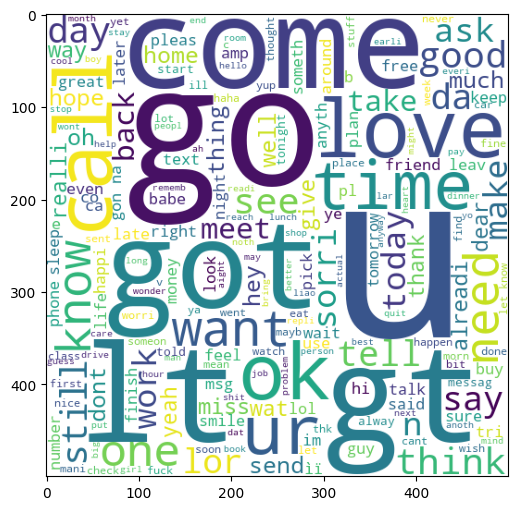

In [117]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [118]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [119]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=textTrainSplit, random_state=2)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [122]:
clfs = {
    'svc': SVC(kernel='sigmoid', gamma=1.0),
    'knc': KNeighborsClassifier(),
    'mnb': MultinomialNB(),
    'dtc': DecisionTreeClassifier(max_depth=5),
    'lrc': LogisticRegression(solver='liblinear', penalty='l1'),
    'rfc': RandomForestClassifier(n_estimators=50, random_state=2),
    'abc': AdaBoostClassifier(n_estimators=50, random_state=2),
    # 'bc': BaggingClassifier(n_estimators=50, random_state=2),
    'etc': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'gbdt': GradientBoostingClassifier(n_estimators=50, random_state=2),
    'xgb': XGBClassifier(n_estimators=50, random_state=2)
}

In [123]:
from sklearn.metrics import accuracy_score, precision_score
import os.path
import pickle

def train_classifier(name, clfs, X_train, y_train, X_test, y_test):
    directory = f"./models/{textTrainSplit * 100}-percent-trained"

    if not os.path.exists(directory):
        os.makedirs(f"./models/{textTrainSplit * 100}-percent-trained")

    file = f"{directory}/{solution}-{name}.pkl"
    
    if os.path.exists(file):
        with open(file, "rb") as f:
            clfs = pickle.load(f)
    else:
        clfs.fit(X_train, y_train)
        with open(file, "wb") as f:
            pickle.dump(clfs, f)
    
    y_preds = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    return accuracy, precision

In [124]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    curr_acc, curr_prec = train_classifier(name, clf, X_train, y_train, X_test, y_test)
    print()
    print(f"For: {name}")
    print(f"Accuarcy: {curr_acc}")
    print(f"Precision: {curr_prec}")

    accuracy_scores.append(curr_acc)
    precision_scores.append(curr_prec)

c:\Users\ssharma\AppData\Local\miniforge3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



For: svc
Accuarcy: 0.8731926533802267
Precision: 0.0

For: knc
Accuarcy: 0.8835482610394686
Precision: 0.9818181818181818


c:\Users\ssharma\AppData\Local\miniforge3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ssharma\AppData\Local\miniforge3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



For: mnb
Accuarcy: 0.8731926533802267
Precision: 0.0

For: dtc
Accuarcy: 0.88315748339195
Precision: 0.9811320754716981

For: lrc
Accuarcy: 0.8731926533802267
Precision: 0.0

For: rfc
Accuarcy: 0.8749511527940602
Precision: 1.0

For: abc
Accuarcy: 0.8993747557639703
Precision: 0.9240506329113924

For: etc
Accuarcy: 0.8767096522078938
Precision: 1.0

For: gbdt
Accuarcy: 0.8991793669402111
Precision: 0.9235668789808917

For: xgb
Accuarcy: 0.8731926533802267
Precision: 0.0


c:\Users\ssharma\AppData\Local\miniforge3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
